Nama : Patrick Jonathan

NIM : 2440064791

Link Video : https://binusianorg-my.sharepoint.com/personal/patrick_jonathan001_binus_ac_id/_layouts/15/guestaccess.aspx?docid=072ccdf82267348128b73d8cd16fbc393&authkey=AZ6pxdfVRXJlMm6h2-96CkE&e=oj8Geh

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download whenamancodes/fraud-detection

 91% 60.0M/66.0M [00:00<00:00, 113MB/s]
100% 66.0M/66.0M [00:00<00:00, 126MB/s]


In [ ]:
! unzip fraud-detection.zip

Archive:  fraud-detection.zip
  inflating: creditcard.csv          


## 1. Load the neccessary Libraries and Data

Import semua library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

Buat Class CreditCardDataset untuk melempar variabel kedalam Class ini dimana variabel akan diubah kedalam bentuk Tensor nantinya

In [ ]:
from torch.utils.data import Dataset

class CreditCardDataset(Dataset):
  def __init__(self, X, y):
    self.X = X # Feature data
    self.y = y # Class

  def __getitem__(self, index):
    X = torch.Tensor(self.X[index]) #Tensor
    y = torch.LongTensor(self.y[index, None]) #LongTensor
    
    return X, y

  def __len__(self):
    return len(self.X)

Buka dan simpan file ke dalam variabel df menggunakan fungsi read_csv yang disediakan library pandas

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Dataset yang digunakan berasal dari kaggle yang berjudul Fraud Detection. Dimana dalam dataset ini kita diminta untuk mengklasifikasikan data apakah suatu data transaksi kartu kredit itu palsu atau tidak. Sehingga kita akan menggunakan metode klasifikasi untuk menyelesaikan masalah ini. Sayangnya, karena masalah kerahasiaan, kami tidak dapat memberikan fitur asli dan informasi latar belakang lainnya tentang data tersebut. Sehingga fitur V1 - V28 adalah komponen utama yang diperoleh dengan PCA (Principal Component Analysis), satu-satunya fitur yang belum diubah dengan PCA adalah 'Time' dan 'Amount'.

'Time' adalah detik yang berlalu antara setiap transaksi dan transaksi pertama dalam dataset. 

'Amount' adalah jumlah transaksi. 

'Class' adalah variabel respon dimana akan bernilai 1 jika data tersebut palsu dan akan bernilai 0 jika data tersebut tidak palsu. 

## 2. EDA (Exploratory Data Analysis)

In [ ]:
df.shape

(284807, 31)

* 284807 Data
* 31 Feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Type of attributes**

Semua atribut dari setiap fiturnya adalah numerik

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Variable Selection**

Sepertinya variabel 'Time' tidak berpengaruh secara signifikan terhadap hasil klasifikasi. Karena variabel 'Time' hanya menjelaskan durasi antara setiap transkasi dan transaksi pertama dalam dataset. Sehingga variabel tersebut akan saya buang dari dataset.

In [ ]:
df = df.drop(['Time'], axis=1)

In [ ]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Distribution**

Karena kita tidak mengetahui fitur asli dari V1-V28 karena sudah melewati tahap PCA. Maka kita hanya akan melihat distribusi dari 'Class' atau variabel responnya. 

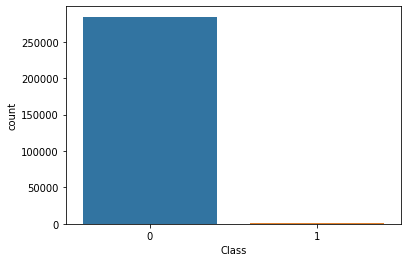

In [ ]:
ax = sns.countplot(x='Class',data=df)

Berdasarkan barplot tersebut, dapat dilihat bahwa perbedaan distribusi actual data dari variabel responnya sangat jauh

**Checking Missing Values**

In [ ]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Berdasarkan data diatas dapat dilihat bahwa dalam dataset ini tidak terdapat missing value.

**Correlation**

In [ ]:
df.corr()['Class'].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

Kita ingin melihat korelasi antara variabel respon yaitu 'Class' dengan variabel prediktor lainnya

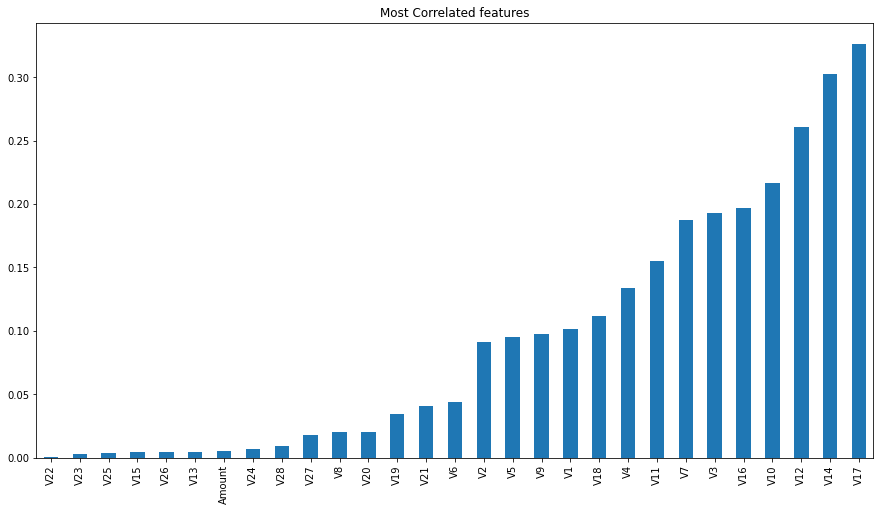

In [ ]:
plt.figure(figsize=(15,8))
plot = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Most Correlated features')
plt.show()

Lalu kita visualisasikan dalam bentuk plot, sehingga dapat dilihat bahwa V17 memiliki hubungan yang paling kuat dengan variabel 'Class' jika dibandingkan dengan variabel prediktor lainnya. 

## 3. Data Preparation

In [ ]:
x = df.drop('Class', axis=1).values
y = df.Class.values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(x)

Kita dapat menggunakan StandardScaler untuk melakukan normalisasi data sehingga data yang digunakan nantinya tidak memiliki penyimpangan yang besar

Selanjutnya kita split dataset menjadi train, test, dan validation dengan rasio 80% train, 10% test, dan 10% validation. Lalu kita masukan train, test, dan validation data tersebut ke dalam DataLoader dan melakukan data batching yang berguna untuk mempercepat pemrosesan data dengan jumlah yang besar. Pada data ini saya menggunakan ukuran batch 30 sampel dan mengacak dataset pada train_loader agar sampel diambil secara random. 

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
test_x, valid_x, test_y, valid_y = train_test_split(test_x, test_y, test_size=0.5, random_state=42)

from torch.utils.data import DataLoader
train_ds = CreditCardDataset(train_x, train_y)
train_loader = DataLoader(train_ds, batch_size=30, shuffle=True, num_workers=0)

test_ds = CreditCardDataset(test_x, test_y)
test_loader = DataLoader(test_ds, batch_size=30, shuffle=False, num_workers=0)

valid_ds = CreditCardDataset(valid_x, valid_y)
valid_loader = DataLoader(valid_ds, batch_size=30, shuffle=False, num_workers=0)

In [ ]:
class Classify(nn.Module):
    def __init__(self):
        super(Classify, self).__init__()
        # Input layer
        self.fc1 = nn.Linear(29, 58)
        # Hidden layer
        self.fc2 = nn.Linear(58, 58) 
        # Output layer
        self.fc3 = nn.Linear(58, 2)
        self.bn1 = nn.BatchNorm1d(58)
        self.bn2 = nn.BatchNorm1d(58)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.bn1(x)
        x = F.relu(self.fc2(x))
        x = self.bn2(x)
        x = self.fc3(x)

        return x

Buat Arsitektur atau Model dari Backpropagation Neural Network dengan menggunakan 29 sebagai input pada input layer karena terdapat 29 variabel prediktor. Lalu dilanjut dengan hidden layer dengan input 2 x Initial Nodes (29) sehingga didapat 58 sebagai input untuk hidden layer. Terakhir pada output layer akan menghasilkan output yaitu jumlah kelas yang akan diklasifikasikan yaitu 2 (Palsu & Tidak Palsu). Lalu kita aplikasikan fungsi relu setelah melewati input layer dan hidden layer. 

Lalu kita panggil model nya dan memilih loss function dan optimizer. 

Loss function yang saya pilih adalah CrossEntropyLoss dan Optimizer yang saya pilih adalah Adam. Karena pada Adam Optimizer, learning rate antara parameter nya akan berbeda atau menyesuaikan (adaptive) di tiap epoch. Dimana dalam dataset ini, sudah dipastikan sebelumnya bahwa perbedaan distribusi variabel responnya sangat besar. Sehingga saya rasa Adam Optimizer merupakan optimizer yang tepat untuk digunakan dalam kasus ini.

In [ ]:
# Instantiating the model
model = Classify()

# Choosing the loss function
criterion = nn.CrossEntropyLoss()

# Choosing the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Pertama-tama disini saya melakukan train tanpa menggunakan optimizer dengan jumlah epoch 50

In [ ]:
epochs = 50

train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):  
    # training 
    train_losses = []
    
    print("=========================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        output = model(X_batch)
        loss = criterion(output, y_batch.squeeze())
        
        loss.backward()
        
        train_losses.append(loss)
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)

    # validation
    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            output = model(X_batch)
            loss = criterion(output, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)

Epoch 0
training loss: 0.79831183
validation loss: 0.79804325
Epoch 1
training loss: 0.79799777
validation loss: 0.79804325
Epoch 2
training loss: 0.79815447
validation loss: 0.79804325
Epoch 3
training loss: 0.79807776
validation loss: 0.79804325
Epoch 4
training loss: 0.79795974
validation loss: 0.79804325
Epoch 5
training loss: 0.79802078
validation loss: 0.79804325
Epoch 6
training loss: 0.79803497
validation loss: 0.79804325
Epoch 7
training loss: 0.79804879
validation loss: 0.79804325
Epoch 8
training loss: 0.79805750
validation loss: 0.79804325
Epoch 9
training loss: 0.79822743
validation loss: 0.79804325
Epoch 10
training loss: 0.79798758
validation loss: 0.79804325
Epoch 11
training loss: 0.79816395
validation loss: 0.79804325
Epoch 12
training loss: 0.79801857
validation loss: 0.79804325
Epoch 13
training loss: 0.79804689
validation loss: 0.79804325
Epoch 14
training loss: 0.79800344
validation loss: 0.79804325
Epoch 15
training loss: 0.79818577
validation loss: 0.79804325
Ep

Dapat dilihat bahwa jika kita melakukan training tanpa optimizer, training serta validation loss yang dihasilkan cukup besar dan tidak menunjukkan perubahan yang signifikan pada setiap epoch nya

Lalu kita lihat hasil testing dari training tanpa optimizer

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        output = model(X_batch)
        
        test_predictions = np.append(test_predictions, output.numpy(), 
                                     axis=0)
        

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))


Predicted Class:
[0 1 0 ... 0 1 1]

Ground Truth:
[0 0 0 ... 0 0 0]


Confusion Matrix:
[[12228 16198]
 [   38    17]]


Accuracy: 0.42993574663810963
F1 Score:  0.3015461948971182


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     28426
           1       0.00      0.31      0.00        55

    accuracy                           0.43     28481
   macro avg       0.50      0.37      0.30     28481
weighted avg       0.99      0.43      0.60     28481



Berdasarkan hasil testing tanpa optimizer, dapat dilihat bahwa : 

* Accuracy : 42.99%
* Precision 0 : 1
* Recall 0 : 0.43
* F1-Score 0 : 0.60
* Precision 1 : 0
* Recall 1 : 0.31
* F1-Score 1 : 0

Dimana angka yang dihasilkan dapat terbilang cukup kecil.

Mari kita lihat apakah prediksinya akan lebih akurat jika kita training menggunakan optimizer 

In [ ]:
epochs = 50

train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):  
    # training 
    train_losses = []
    
    print("=========================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data

        optimizer.zero_grad()
        
        output = model(X_batch)
        loss = criterion(output, y_batch.squeeze())
        
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss)
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)

    # validation
    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            output = model(X_batch)
            loss = criterion(output, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)

Epoch 0
training loss: 0.01480264
validation loss: 0.00542871
Epoch 1
training loss: 0.00369153
validation loss: 0.00284048
Epoch 2
training loss: 0.00325660
validation loss: 0.00287424
Epoch 3
training loss: 0.00289571
validation loss: 0.00292494
Epoch 4
training loss: 0.00277837
validation loss: 0.00321526
Epoch 5
training loss: 0.00265683
validation loss: 0.00321316
Epoch 6
training loss: 0.00255194
validation loss: 0.00328755
Epoch 7
training loss: 0.00244024
validation loss: 0.00323530
Epoch 8
training loss: 0.00231977
validation loss: 0.00343004
Epoch 9
training loss: 0.00216070
validation loss: 0.00368738
Epoch 10
training loss: 0.00216093
validation loss: 0.00348976
Epoch 11
training loss: 0.00205218
validation loss: 0.00360459
Epoch 12
training loss: 0.00188769
validation loss: 0.00324541
Epoch 13
training loss: 0.00179304
validation loss: 0.00330146
Epoch 14
training loss: 0.00180046
validation loss: 0.00346931
Epoch 15
training loss: 0.00172500
validation loss: 0.00388622
Ep

Berbeda dengan yang sebelumnya, jika kita melakukan training dengan optimizer, training serta validation loss yang dihasilkan cukup kecil dan menunjukkan perubahan yang signifikan pada setiap epoch nya. Dimana semakin lama hasil loss menunjukkan angka yang lebih kecil dari sebelumnya. Hal ini dapat dilihat dari perbedaan antara training dan validation loss pada epoch pertama dengan training dan validation loss pada epoch terakhir. 

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        output = model(X_batch)
        
        test_predictions = np.append(test_predictions, output.numpy(), 
                                     axis=0)

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))


Confusion Matrix:
[[28424     2]
 [   17    38]]


Accuracy: 0.9993328885923949
F1 Score:  0.8998329435349148


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28426
           1       0.95      0.69      0.80        55

    accuracy                           1.00     28481
   macro avg       0.97      0.85      0.90     28481
weighted avg       1.00      1.00      1.00     28481



Berdasarkan hasil testing dengan menggunakan optimizer dapat dilihat bahwa : 

* Accuracy : 99.93%
* Precision 0 : 1
* Recall 0 : 1
* F1-Score 0 : 1
* Precision 1 : 0.95
* Recall 1 : 0.69
* F1-Score 1 : 0.8

Mari kita bandingkan hasilnya dengann hasil testing tanpa optimizer

Hasil testing tanpa optimizer :

* Accuracy : 42.99%
* Precision 0 : 1
* Recall 0 : 0.43
* F1-Score 0 : 0.60
* Precision 1 : 0
* Recall 1 : 0.31
* F1-Score 1 : 0

Jika kita lihat kedua perbandingan tersebut, dapat dilihat bahwa semua hasil testing dengan menggunakan optimizer mengungguli semua aspek dari hasil testing tanpa optimizer. Ini artinya optimizer atau hyperparameter tuning yang dilakukan sudah tepat dan bekerja dengan baik. 